In [1]:
pip install pandas matplotlib seaborn plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
# Load dataset
df = pd.read_csv('botak.csv')

# Cek 5 baris pertama
print(df.head())

# Cek info data
print(df.info())

   umur jenis_kelamin       pekerjaan      provinsi          gaji  is_menikah  \
0  42.0     Laki-laki             PNS        Padang  7.864005e+06           0   
1  33.0     Laki-laki  Pegawai swasta  Palangkaraya  6.492662e+06           0   
2  59.0     Laki-laki       Freelance        Serang  8.086303e+06           1   
3  38.0     Laki-laki  Pegawai swasta     Gorontalo  1.147321e+07           0   
4  33.0     Perempuan       Freelance  Tanjungselor  1.475942e+07           0   

   is_keturunan      berat      tinggi     sampo  is_merokok pendidikan  \
0           0.0  61.928685  152.174164  Deadbuoy           1         S1   
1           0.0  49.374507  152.822969  Moonsilk           1        SMA   
2           0.0  59.072807  159.911047   Merpati           1         S1   
3           1.0  68.338014  162.558997  Moonsilk           0         S1   
4           0.0  53.769996  154.579510   Pantone           1         S2   

   botak_prob  
0    0.487655  
1    0.297270  
2    0.467848 

In [7]:
print(df.describe())

              umur          gaji   is_menikah  is_keturunan        berat  \
count  7991.000000  7.968000e+03  7991.000000   7976.000000  7952.000000   
mean     39.604805  9.466150e+06     0.030284      0.193455    56.449251   
std      10.014420  4.809191e+06     0.171379      0.395032     9.581271   
min       3.000000  1.500000e+06     0.000000      0.000000    40.000000   
25%      33.000000  6.109338e+06     0.000000      0.000000    49.919026   
50%      40.000000  8.412740e+06     0.000000      0.000000    54.237651   
75%      46.000000  1.153660e+07     0.000000      0.000000    60.770302   
max      78.000000  5.000000e+07     1.000000      1.000000   150.000000   

            tinggi   is_merokok   botak_prob  
count  7991.000000  7991.000000  7991.000000  
mean    157.547757     0.499312     0.395915  
std       6.568111     0.500031     0.191092  
min     136.197006     0.000000    -0.115700  
25%     153.093636     0.000000     0.260501  
50%     157.233899     0.000000  

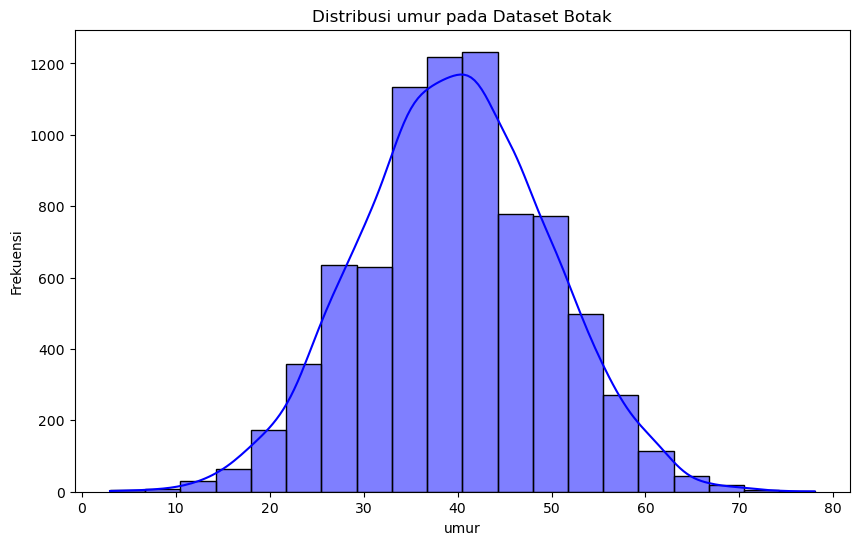

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['umur'], bins=20, kde=True, color='blue')
plt.title('Distribusi umur pada Dataset Botak')
plt.xlabel('umur')
plt.ylabel('Frekuensi')
plt.savefig('histogram_umur.png')  # Simpan gambar
plt.show()

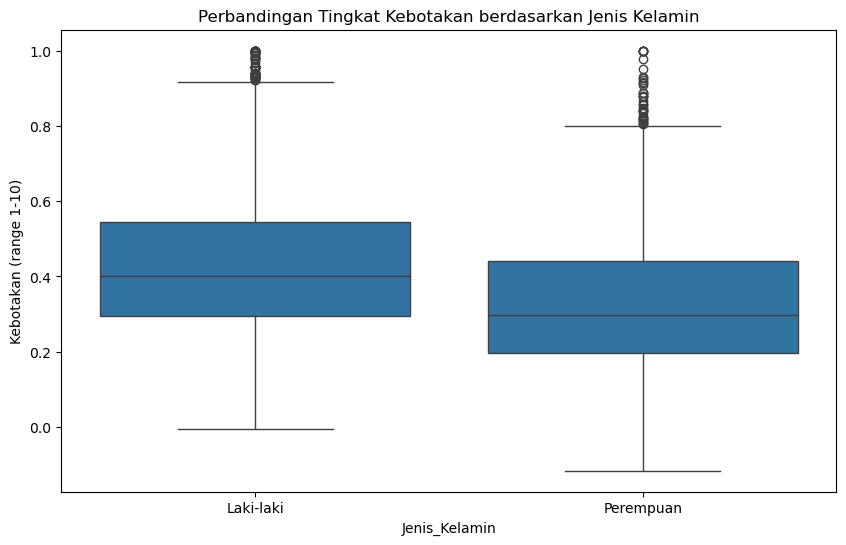

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='jenis_kelamin', y='botak_prob', data=df)
plt.title('Perbandingan Tingkat Kebotakan berdasarkan Jenis Kelamin')
plt.xlabel('Jenis_Kelamin')
plt.ylabel('Kebotakan (range 1-10)')
plt.savefig('boxplot_Botak.png')
plt.show()

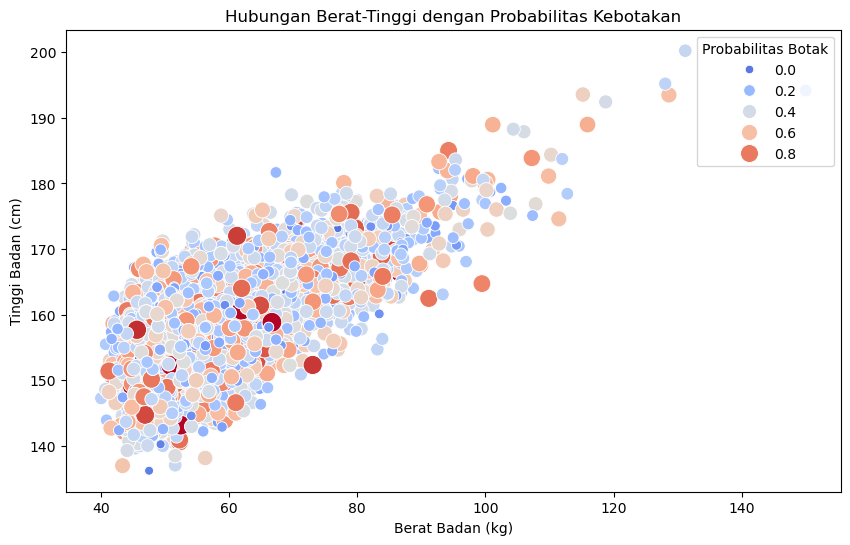

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='berat', 
    y='tinggi', 
    hue='botak_prob', 
    data=df,
    palette="coolwarm",
    size='botak_prob',  # Ukuran titik berdasarkan probabilitas kebotakan
    sizes=(20, 200)
)
plt.title('Hubungan Berat-Tinggi dengan Probabilitas Kebotakan')
plt.xlabel('Berat Badan (kg)')
plt.ylabel('Tinggi Badan (cm)')
plt.legend(title='Probabilitas Botak', loc='upper right')
plt.savefig('scatter_berat_tinggi.png')
plt.show()

In [39]:
# Hapus missing values di kolom terkait
df = df.dropna(subset=['umur', 'jenis_kelamin', 'botak_prob'])


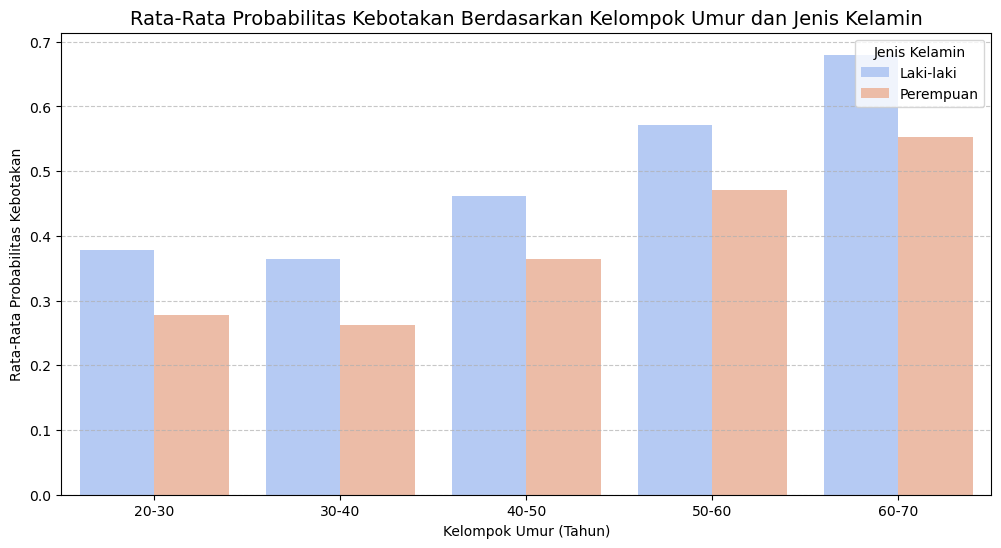

In [54]:

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x='kelompok_umur', 
    y='botak_prob', 
    hue='jenis_kelamin', 
    data=df, 
    palette="coolwarm",
    errorbar=None  # Nonaktifkan confidence interval untuk visualisasi lebih jelas
)
plt.title('Rata-Rata Probabilitas Kebotakan Berdasarkan Kelompok Umur dan Jenis Kelamin', fontsize=14)
plt.xlabel('Kelompok Umur (Tahun)')
plt.ylabel('Rata-Rata Probabilitas Kebotakan')
plt.legend(title='Jenis Kelamin', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('umur_jeniskelamin_botak.png')
plt.show()